In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Пути к директориям файлов

In [2]:
TRAIN_DATASET_PATH = 'Downloads/train.csv'
TEST_DATASET_PATH = 'Downloads/test.csv'

# Загрузка данных

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [5]:
train_df.shape[1]

20

In [6]:
train_df.shape[1] - 1 == test_df.shape[1]

True

# Приведение типов данных

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [9]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [10]:
train_df['Rooms'] = train_df['Rooms'].astype('int64')
train_df['HouseFloor'] = train_df['HouseFloor'].astype('int64')

train_df['Rooms'] = train_df['Rooms'].astype('int64')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int64')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

# Обзор данных

### Целевая переменная

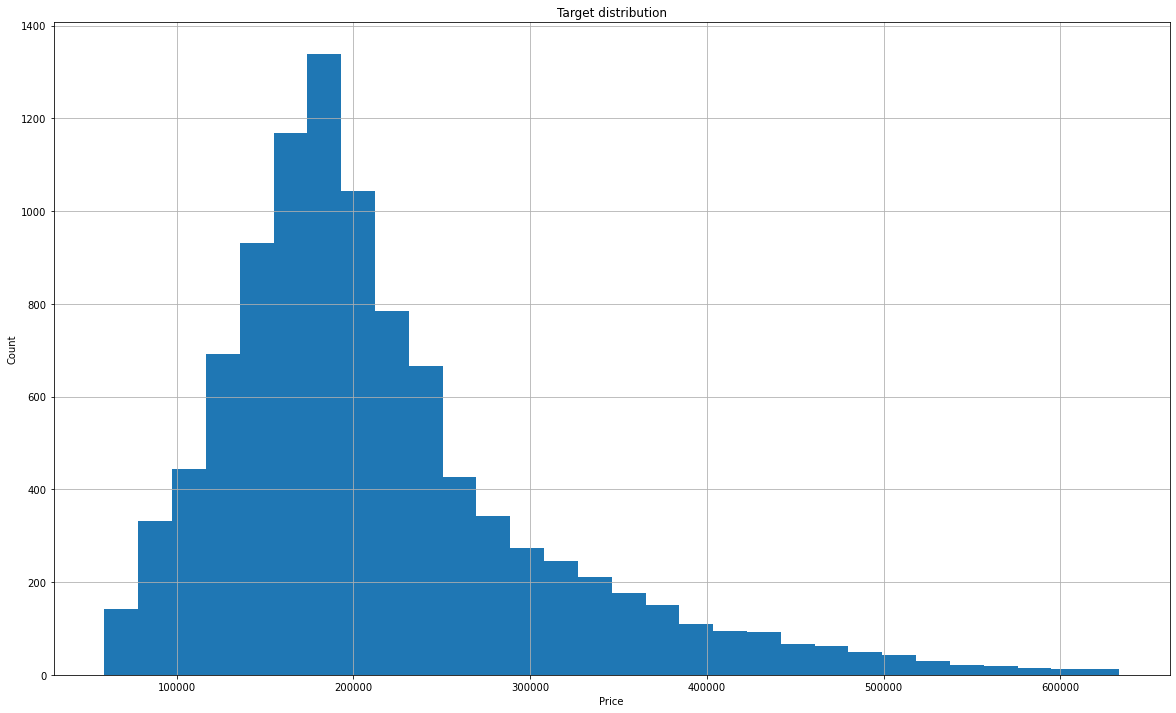

In [12]:
plt.figure(figsize=(20, 12))

train_df['Price'].hist(bins=30)
plt.xlabel('Price')
plt.ylabel('Count')

plt.title('Target distribution')
plt.show()

### Количественные переменные

In [13]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [14]:
train_df[train_df['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0,138.427694,136.215499,0.0,4,3,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0,212.932361,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0,41.790881,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0,81.491446,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0,87.762616,85.125471,0.0,5,15,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


### Категориальные признаки

In [15]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [16]:
train_df['DistrictId'].value_counts().head()

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [17]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [19]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

# Обработка выбросов

In [20]:
train_df['Rooms'].value_counts()

2     3880
1     3705
3     2235
4      150
5       18
0        8
10       2
19       1
6        1
Name: Rooms, dtype: int64

In [21]:
def fix_rooms(df):
    df.loc[df['Rooms'].isin([0, 10, 17, 19]), 'Rooms'] = df['Rooms'].median()
    return df

In [22]:
fix_rooms(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2,50.401785,30.476203,5.0,6,5,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1,47.939008,NaN,1.0,12,16,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [23]:
train_df['Rooms'].value_counts()

2    3891
1    3705
3    2235
4     150
5      18
6       1
Name: Rooms, dtype: int64

### Square, LifeSquare, KitchenSquare


In [24]:

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
    
train_df = train_df[train_df['Square'].isna() |
    (train_df['Square'] < train_df['Square'].quantile(.975)) |
    (train_df['Square'] > train_df['Square'].quantile(.025))]

train_df = train_df[train_df['LifeSquare'].isna() |
    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.975)) |
    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))]

train_df = train_df[train_df['KitchenSquare'].isna() |
    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

In [25]:
train_df.shape

(9744, 20)

In [26]:
def scatter_square_func(df):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    ax1, ax2, ax3, ax4 = ax.flatten()

    ax1.scatter(df['Square'], df['Price'])
    ax1.set_title('Square/Price', fontweight='bold')
    ax2.scatter(df['LifeSquare'], df['Price'])
    ax2.set_title('LifeSquare/Price', fontweight='bold')
    ax3.scatter(df['KitchenSquare'], df['Price'])
    ax3.set_title('KitchenSquare/Price', fontweight='bold')
    ax4.scatter(df['Rooms'], df['Price'])
    ax4.set_title('Rooms/Price', fontweight='bold')
    fig.set_size_inches(8, 6)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [27]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9744.000000,9744.000000,7642.000000,9744.000000,9744.000000,9744.000000,9.744000e+03,9744.000000,9744.000000,9744.000000,9744.000000,5071.000000,9744.000000,9744.000000,9744.000000
mean,1.882184,55.627392,36.768198,6.196326,8.509134,12.517755,4.042403e+03,0.119397,24.771860,5366.247947,8.072147,1138.791165,1.322557,4.254721,212353.727025
std,0.806595,20.168710,87.415571,2.774598,5.215673,6.682542,2.031170e+05,0.119395,17.543213,4011.273593,23.937708,1020.967412,1.487890,4.820964,90384.883009
min,1.000000,1.136859,0.370619,3.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.628939,22.698661,3.000000,4.000000,9.000000,1.973000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153781.674885
50%,2.000000,52.014030,32.525279,6.000000,7.000000,12.000000,1.977000e+03,0.075779,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,191638.626648
75%,2.000000,65.438927,44.766473,8.000000,12.000000,17.000000,1.999000e+03,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,247066.450374
max,6.000000,641.065193,7480.592129,12.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


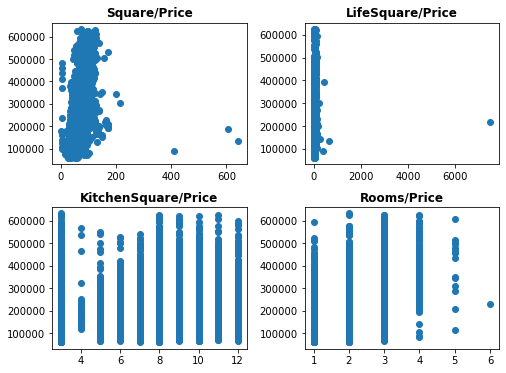

In [28]:
scatter_square_func(train_df)

In [29]:
train_df['Square'].sort_values(ascending=False)

6977    641.065193
4262    604.705972
4690    409.425181
1981    212.932361
8511    198.930182
           ...    
9294      2.954309
1608      2.596351
4853      2.377248
8283      1.988943
6392      1.136859
Name: Square, Length: 9744, dtype: float64

In [30]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].sort_values(ascending=False, by='LifeSquare')

,Square,LifeSquare,KitchenSquare
4328,81.694417,7480.592129,3.0
6977,641.065193,638.163193,10.0
8437,78.059331,461.463614,10.0
4690,409.425181,410.639749,10.0
590,48.449873,263.542020,5.0
...,...,...,...
9985,38.968338,NaN,3.0
9986,64.994245,NaN,3.0
9987,55.620092,NaN,3.0
9994,64.864198,NaN,3.0


In [31]:
train_df.loc[(train_df['LifeSquare'] > train_df['Square'], 'Square')].sort_values()

6392      1.136859
8283      1.988943
1608      2.596351
9294      2.954309
3280      4.380726
           ...    
3444    123.846928
3183    135.164231
8913    162.587886
3651    169.509941
4690    409.425181
Name: Square, Length: 469, dtype: float64

In [32]:
def fix_square(df):
    df.loc[df['Square'] > 400, 'Square'] = df['Square'].median()
    df.loc[df['LifeSquare'] > 6000, 'LifeSquare'] = df['LifeSquare'] / 10
    df.loc[df['Square'] < df['LifeSquare'], 'LifeSquare'] = df.loc[df['Square'] < df['LifeSquare'], 'Square']
    return df

In [33]:
fix_square(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2,50.401785,30.476203,5.0,6,5,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1,47.939008,NaN,3.0,12,16,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


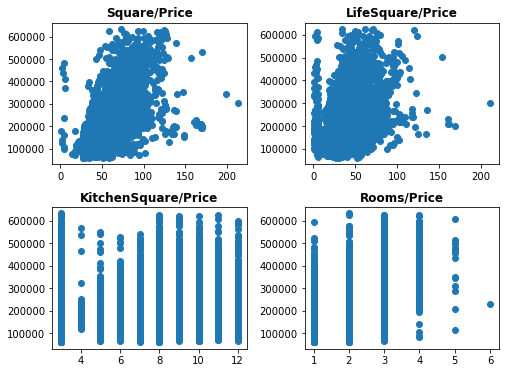

In [34]:
scatter_square_func(train_df)

In [35]:
(train_df['Square'] < train_df['LifeSquare']).value_counts()

False    9744
dtype: int64

### Floor, HouseFloor

In [36]:
train_df['HouseFloor'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  32,  37,  38,  39,  40,  44,  45,  48,
        99, 117])

In [37]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [38]:
def fix_house_floor(df):
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()
    
    floor_outliers = df.loc[df['Floor'] > df['HouseFloor']].index
    df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
    return df

In [39]:
fix_house_floor(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2,50.401785,30.476203,5.0,1,5,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1,47.939008,NaN,3.0,12,16,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


### HouseYear

In [40]:
train_df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
7076        2020
2493        2020
4053        2020
          ...   
8505        1918
8144        1917
1380        1917
5053        1917
910         1914
Name: HouseYear, Length: 9744, dtype: int64

In [41]:
def fix_house_year(df):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [42]:
fix_house_year(train_df)

In [43]:
train_df['HouseYear'].sort_values(ascending=False)

1497    2020
4376    2020
2493    2020
4053    2020
1499    2020
        ... 
8505    1918
8144    1917
1380    1917
5053    1917
910     1914
Name: HouseYear, Length: 9744, dtype: int64

# Обработка пропусков

In [44]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2102
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4673
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [45]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,3.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,3.0
8,64.511437,NaN,3.0
9,46.461409,18.915552,8.0


### LifeSquare

In [46]:
mean_square_ratio = (train_df['Square'] / train_df['LifeSquare']).median()
mean_square_ratio

1.6145200764693444

In [47]:
def fix_LifeSquare(df):
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] / mean_square_ratio
    return df

In [48]:
fix_LifeSquare(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2,50.401785,30.476203,5.0,1,5,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1,47.939008,29.692420,3.0,12,16,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [49]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4673
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

### HealthCare_1

In [50]:
def fix_healthcare_1(df):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
    return df

In [51]:
fix_healthcare_1(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2,50.401785,30.476203,5.0,1,5,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,B,B,30,5562,0,900.0,0,5,A,189050.289571
9997,5123,27,1,47.939008,29.692420,3.0,12,16,2015,0.072158,B,B,2,629,1,900.0,0,0,A,159143.805370
9998,5400,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [52]:
len(train_df) - train_df.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

# Построение новых признаков

### Dummies

In [53]:
def get_dummies(df):
    df['Ecology_2'] = df['Ecology_2'].replace({'A': 0, 'B': 1})
    df['Ecology_3'] = df['Ecology_3'].replace({'A': 0, 'B': 1})
    df['Shops_2'] = df['Shops_2'].replace({'A': 0, 'B': 1})
    return df

In [54]:
get_dummies(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,1,1,33,7976,5,900.0,0,11,1,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2,50.401785,30.476203,5.0,1,5,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,1,1,30,5562,0,900.0,0,5,0,189050.289571
9997,5123,27,1,47.939008,29.692420,3.0,12,16,2015,0.072158,1,1,2,629,1,900.0,0,0,0,159143.805370
9998,5400,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


### DistrictSize, IsDistrictLarge

In [55]:
district_size = train_df['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId', 'DistrictId': 'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,810
1,1,646
2,23,546
3,6,503
4,9,292


In [56]:
district_size = train_df['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId', 'DistrictId': 'DistrictSize'})
train_df = train_df.merge(district_size, on='DistrictId', how='left')

In [57]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,...,1,33,7976,5,900.0,0,11,1,184966.930730,22
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,...,1,46,10309,1,240.0,1,16,1,300009.450063,86
2,4765,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,...,1,34,7759,0,229.0,1,3,1,220925.908524,170
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,...,1,23,5735,3,1084.0,0,5,1,175616.227217,174
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,...,1,35,5776,1,2078.0,2,4,1,150226.531644,97


In [58]:
district_size = test_df['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId', 'DistrictId': 'DistrictSize'})
test_df = test_df.merge(district_size, on='DistrictId', how='left')

In [59]:
(train_df['DistrictSize'] > 100).value_counts()

True     4943
False    4801
Name: DistrictSize, dtype: int64

In [60]:
def is_district_large(df):
    df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(int)
    return df

In [61]:
is_district_large(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,...,33,7976,5,900.0,0,11,1,184966.930730,22,0
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,...,46,10309,1,240.0,1,16,1,300009.450063,86,0
2,4765,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,...,34,7759,0,229.0,1,3,1,220925.908524,170,1
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,...,23,5735,3,1084.0,0,5,1,175616.227217,174,1
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,...,35,5776,1,2078.0,2,4,1,150226.531644,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,77,32,2,50.401785,30.476203,5.0,1,5,1968,0.135650,...,46,7960,6,350.0,3,11,1,196684.316040,34,0
9740,6159,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,...,30,5562,0,900.0,0,5,0,189050.289571,51,0
9741,5123,27,1,47.939008,29.692420,3.0,12,16,2015,0.072158,...,2,629,1,900.0,0,0,0,159143.805370,810,1
9742,5400,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,...,30,5048,9,325.0,2,5,1,181595.339808,65,0


# Отбор признаков

In [62]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'IsDistrictLarge']

In [63]:
feature_names = [
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
]

In [64]:
new_feature_names = ['DistrictSize','IsDistrictLarge']

In [65]:
target_name = 'Price'

# Разбиение на train и test

In [66]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных

In [68]:
scaler = StandardScaler()

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge
0,0.061113,0.155054,-0.060677,-0.131265,0.649808,-0.468436,-0.131693,-0.083405,-0.591996,0.100355,0.166516,0.518170,0.591784,-0.335185,-1.053983,-0.222822,-0.258187,0.293531,-0.245314,0.986021
1,-0.466702,-1.087564,-1.406273,-1.067456,-1.157569,-1.070875,0.666093,1.678505,-1.009369,0.100355,0.166516,-0.168828,0.250890,5.700336,0.036384,1.127377,3.958377,0.293531,-0.031327,0.986021
2,-0.489651,-1.087564,-1.158994,-1.012429,-0.434618,-0.468436,-1.248593,-1.074479,-0.278304,0.100355,0.166516,-0.855826,-0.781312,-0.249575,0.705018,-0.897922,-0.890672,0.293531,-0.560458,-1.014177
3,-0.466702,-1.087564,-0.862050,-0.689401,-1.157569,-0.468436,0.666093,-0.413763,-1.009369,0.100355,0.166516,-0.168828,0.250890,5.700336,0.036384,1.127377,3.958377,0.293531,-0.031327,0.986021
4,-0.856826,0.155054,0.079996,-0.085672,1.011283,-0.669249,-0.450808,0.687431,-0.245342,0.100355,0.166516,2.808162,3.428147,-0.249575,-0.158467,2.477576,2.271751,0.293531,-0.533224,-1.014177


In [70]:
X_valid_scaled = scaler.fit_transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)
X_valid_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge
0,1.795523,-1.108477,-0.753302,-0.931679,0.650809,1.090240,0.168756,0.488730,-0.977431,0.094719,0.171981,0.149146,-0.122878,-0.342455,-1.364189,0.462419,0.735588,0.303756,-0.671266,-1.015858
1,0.111968,0.125321,0.136167,-0.196260,1.008846,0.694944,0.629055,0.878192,-0.635226,0.094719,0.171981,0.375018,0.067337,-0.342455,-0.185807,-0.202991,-0.065030,0.303756,-0.690371,-1.015858
2,-0.303155,0.125321,-0.336204,-0.242729,-0.065265,-0.688590,0.168756,-0.512743,0.079918,0.094719,0.171981,0.205614,0.491186,-0.144178,-0.971395,-0.202991,-0.265184,0.303756,-0.640697,-1.015858
3,1.126714,0.125321,0.090579,0.022810,1.008846,0.102001,0.168756,0.766917,-0.700347,0.094719,0.171981,2.351398,1.301879,-0.302799,0.385776,1.127828,0.735588,0.303756,-0.541349,-1.015858
4,-1.018090,-1.108477,-0.859326,-2.017919,-1.139375,-1.281534,-1.825876,-0.401468,1.034530,0.094719,0.171981,-1.093150,-0.920742,-0.342455,-0.673414,-0.868400,-0.865647,0.303756,1.010006,0.984390


# Построение модели

## Random Forest Regressor

In [71]:
# parameters = {
#     'n_estimators': [150, 200, 250],
#     'max_features': np.arange(5, 22),
#     'max_depth': np.arange(5, 20),
# }

# random_forest = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=parameters,
#     scoring='r2',
#     cv=5,
# )

In [72]:
# %%time
# random_forest.fit(X_train, y_train)

In [73]:
# random_forest.best_params_

In [74]:
random_forest = RandomForestRegressor(max_depth=18, max_features=7, n_estimators=250)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_valid)

r2_score(y_valid, y_pred)

0.743272380779165

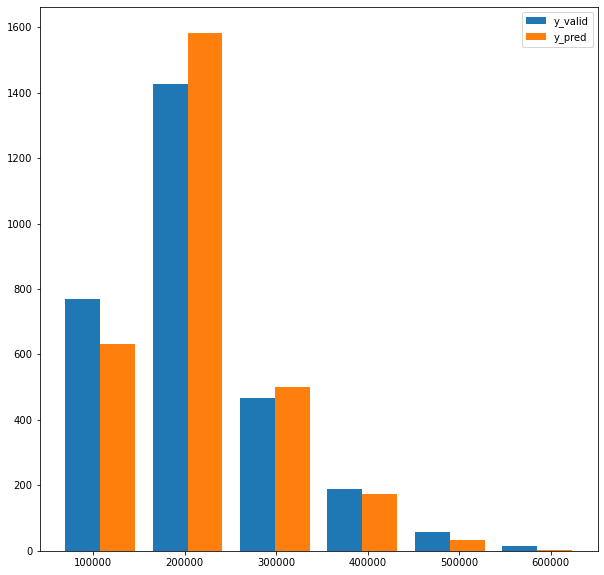

In [76]:
plt.hist([y_valid, y_pred], bins=6)
plt.legend(labels=['y_valid', 'y_pred'])
plt.rcParams['figure.figsize'] = 10, 20
plt.show()

# Подготовка тестовых данных

In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   int64  
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [78]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,DistrictSize
count,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000
mean,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,115.537200
std,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,127.381882
min,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,27.000000
50%,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,49.000000
75%,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,257.000000
max,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,391.000000


# Приведение типов данных

In [79]:
test_df['Rooms'] = test_df['Rooms'].astype('int64')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int64')

# Обработка данных

### Rooms

In [80]:
fix_rooms(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,91
1,15856,74,2,69.263183,NaN,1.0,6,1,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,61
2,5480,190,1,13.597819,15.948246,12.0,2,5,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,2
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,49
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,B,B,2,629,1,NaN,0,0,A,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,45
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,B,B,1,264,0,NaN,0,1,B,344
4997,5783,12,3,77.842178,48.282625,9.0,23,22,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,36
4998,4780,62,2,81.305222,NaN,0.0,4,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,122


### Square, LifeSquare, KitchenSquare

In [81]:
fix_square(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,91
1,15856,74,2,69.263183,NaN,1.0,6,1,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,61
2,5480,190,1,13.597819,13.597819,12.0,2,5,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,2
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,49
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,B,B,2,629,1,NaN,0,0,A,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,45
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,B,B,1,264,0,NaN,0,1,B,344
4997,5783,12,3,77.842178,48.282625,9.0,23,22,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,36
4998,4780,62,2,81.305222,NaN,0.0,4,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,122


In [82]:
fix_LifeSquare(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,91
1,15856,74,2,69.263183,42.900169,1.0,6,1,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,61
2,5480,190,1,13.597819,13.597819,12.0,2,5,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,2
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,49
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,B,B,2,629,1,NaN,0,0,A,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,45
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,B,B,1,264,0,NaN,0,1,B,344
4997,5783,12,3,77.842178,48.282625,9.0,23,22,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,36
4998,4780,62,2,81.305222,50.358756,0.0,4,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,122


### HouseYear, HouseFloor

In [83]:
fix_house_year(test_df)

In [84]:
fix_house_floor(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,91
1,15856,74,2,69.263183,42.900169,1.0,1,1,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,61
2,5480,190,1,13.597819,13.597819,12.0,2,5,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,2
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,49
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,B,B,2,629,1,NaN,0,0,A,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,45
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,B,B,1,264,0,NaN,0,1,B,344
4997,5783,12,3,77.842178,48.282625,9.0,21,22,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,36
4998,4780,62,2,81.305222,50.358756,0.0,4,12,1977,0.072158,B,B,2,629,1,NaN,0,0,A,122


### HealthCare_1

In [85]:
fix_healthcare_1(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,B,B,11,2748,1,900.0,0,0,B,91
1,15856,74,2,69.263183,42.900169,1.0,1,1,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,61
2,5480,190,1,13.597819,13.597819,12.0,2,5,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,2
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,B,B,23,4583,3,900.0,3,3,B,49
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,B,B,2,629,1,900.0,0,0,A,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,B,B,36,5992,0,900.0,1,1,B,45
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,B,B,1,264,0,900.0,0,1,B,344
4997,5783,12,3,77.842178,48.282625,9.0,21,22,1989,0.090799,B,B,74,19083,2,900.0,5,15,B,36
4998,4780,62,2,81.305222,50.358756,0.0,4,12,1977,0.072158,B,B,2,629,1,900.0,0,0,A,122


# Добавление новых признаков

In [86]:
get_dummies(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,91
1,15856,74,2,69.263183,42.900169,1.0,1,1,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,61
2,5480,190,1,13.597819,13.597819,12.0,2,5,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,2
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,49
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,1,1,2,629,1,900.0,0,0,0,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,1,1,36,5992,0,900.0,1,1,1,45
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,1,1,1,264,0,900.0,0,1,1,344
4997,5783,12,3,77.842178,48.282625,9.0,21,22,1989,0.090799,1,1,74,19083,2,900.0,5,15,1,36
4998,4780,62,2,81.305222,50.358756,0.0,4,12,1977,0.072158,1,1,2,629,1,900.0,0,0,0,122


In [87]:
is_district_large(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,...,1,11,2748,1,900.0,0,0,1,91,0
1,15856,74,2,69.263183,42.900169,1.0,1,1,1977,0.075779,...,1,6,1437,3,900.0,0,2,1,61,0
2,5480,190,1,13.597819,13.597819,12.0,2,5,1909,0.000000,...,1,30,7538,87,4702.0,5,5,1,2,0
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,...,1,23,4583,3,900.0,3,3,1,49,0
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,...,1,2,629,1,900.0,0,0,0,391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,...,1,36,5992,0,900.0,1,1,1,45,0
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,...,1,1,264,0,900.0,0,1,1,344,1
4997,5783,12,3,77.842178,48.282625,9.0,21,22,1989,0.090799,...,1,74,19083,2,900.0,5,15,1,36,0
4998,4780,62,2,81.305222,50.358756,0.0,4,12,1977,0.072158,...,1,2,629,1,900.0,0,0,0,122,1


# Проверка корректности данных

In [88]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.90780,56.449500,36.283944,5.976800,7.521800,12.915400,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600,115.537200,0.325000
std,0.81008,19.092787,16.212673,9.950018,5.153798,6.468617,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001,127.381882,0.468422
min,1.00000,1.378543,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,1.00000,41.906231,24.383243,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000,27.000000,0.000000
50%,2.00000,52.921340,33.461795,6.000000,6.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000,49.000000,0.000000
75%,2.00000,66.285129,44.906163,9.000000,11.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000,257.000000,1.000000
max,6.00000,223.453689,168.729035,620.000000,46.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,391.000000,1.000000


In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               5000 non-null   object 
 1   DistrictId       5000 non-null   object 
 2   Rooms            5000 non-null   int64  
 3   Square           5000 non-null   float64
 4   LifeSquare       5000 non-null   float64
 5   KitchenSquare    5000 non-null   float64
 6   Floor            5000 non-null   int64  
 7   HouseFloor       5000 non-null   int64  
 8   HouseYear        5000 non-null   int64  
 9   Ecology_1        5000 non-null   float64
 10  Ecology_2        5000 non-null   int64  
 11  Ecology_3        5000 non-null   int64  
 12  Social_1         5000 non-null   int64  
 13  Social_2         5000 non-null   int64  
 14  Social_3         5000 non-null   int64  
 15  Healthcare_1     5000 non-null   float64
 16  Helthcare_2      5000 non-null   int64  
 17  Shops_1       

# Результат

In [90]:
test_features = feature_names + new_feature_names

In [91]:
test_df['Price'] = random_forest.predict(test_df[test_features])

In [92]:
test_df[['Id', 'Price']]

,Id,Price
0,725,183024.761438
1,15856,226329.302389
2,5480,236532.711337
3,15664,336839.189763
4,14275,137793.934173
...,...,...
4995,8180,255752.913285
4996,4695,120325.903516
4997,5783,337261.968059
4998,4780,214493.623567


In [93]:
test_df[['Id', 'Price']].to_csv('AGromov_predictions.csv', index=None)